# Ridge and Lasso Test - Python Model

## Importing the nessesary libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

from sklearn.impute import SimpleImputer 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv("C:/Users/aleksandar.dimitrov/Desktop/Python Tests/Data/vehicules_par.csv")
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
data.describe

<bound method NDFrame.describe of       mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1      

## Data preprocessing

Identifying junk values in "horsepower" column

In [4]:
data[data["horsepower"].str.isnumeric() == False]



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


Replacing the junk values with "nan"

In [5]:
data = data.replace("?", np.nan)


Handling "nan" values with imputation

In [6]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(data[['horsepower']])
data['horsepower'] = imputer.transform(data[['horsepower']])
print(data.horsepower)

if data['horsepower'].isnull().any():
    print("The 'horsepower' column contains missing values (NaN)")
else:
    print("The 'horsepower' column does not contain missing values (NaN)")


0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: object
The 'horsepower' column does not contain missing values (NaN)


## Distribution of Predictors

In [7]:
x = data.drop("mpg", axis=1)
y = data[["mpg"]]


We observe that 'displacement', 'horsepower', and 'weight' columns are right-skewed. This means that their distributions have a longer tail towards the higher values, indicating that there are more instances with larger values compared to smaller values. These variables have a heavier concentration of data towards the higher end.

C:\Users\aleksandar.dimitrov\AppData\Local\Temp\ipykernel_12480\462871963.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


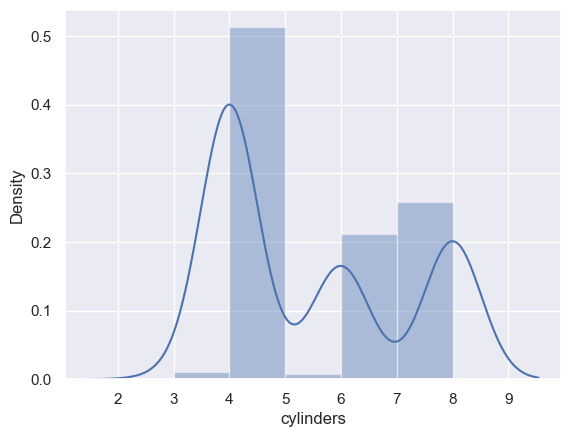

C:\Users\aleksandar.dimitrov\AppData\Local\Temp\ipykernel_12480\462871963.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


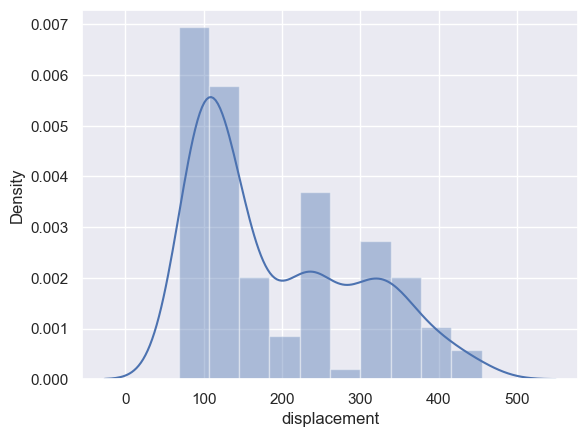

C:\Users\aleksandar.dimitrov\AppData\Local\Temp\ipykernel_12480\462871963.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


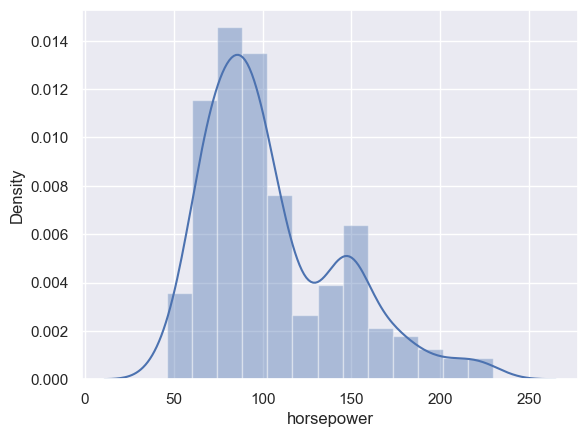

C:\Users\aleksandar.dimitrov\AppData\Local\Temp\ipykernel_12480\462871963.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


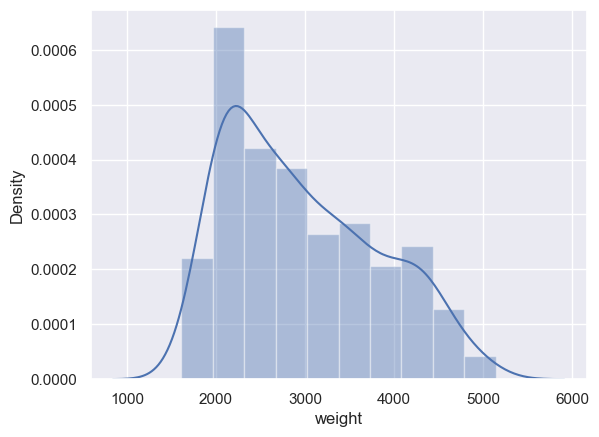

C:\Users\aleksandar.dimitrov\AppData\Local\Temp\ipykernel_12480\462871963.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


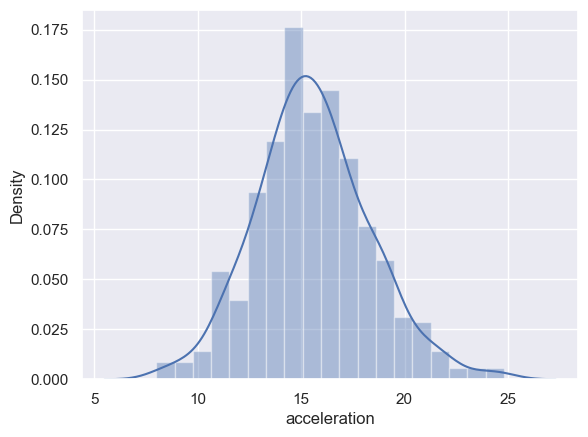

C:\Users\aleksandar.dimitrov\AppData\Local\Temp\ipykernel_12480\462871963.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


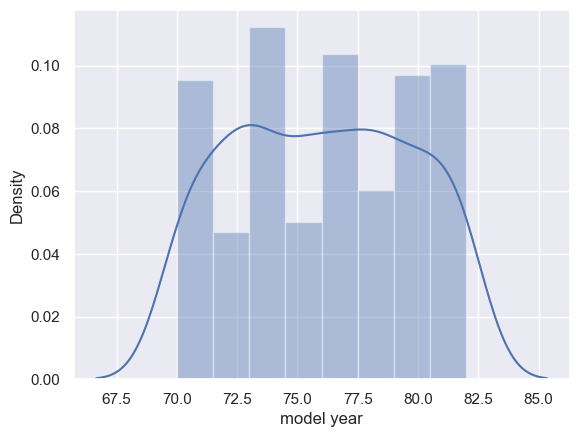

In [8]:
x = ["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"]
for i in x:
    plt.figure()
    sns.distplot(data[i])
    plt.show()



## Distribution of dependant Variable 

C:\Users\aleksandar.dimitrov\AppData\Local\Temp\ipykernel_12480\2236120449.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y["mpg"])


<Axes: xlabel='mpg', ylabel='Density'>

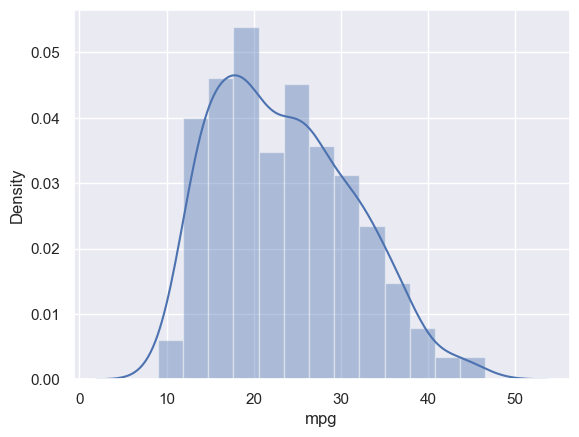

In [9]:
sns.distplot(y["mpg"])

## Predictors and Response Scalling

Predictors Scalling

In [10]:
# Scaling predictors
x_columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
scaler_x = StandardScaler()
data[x_columns] = scaler_x.fit_transform(data[x_columns])
print(data[x_columns])

     cylinders  displacement  horsepower    weight  acceleration  model year
0     1.498191      1.090604    0.644426  0.630870     -1.295498   -1.627426
1     1.498191      1.503514    1.552280  0.854333     -1.477038   -1.627426
2     1.498191      1.196232    1.163200  0.550470     -1.658577   -1.627426
3     1.498191      1.061796    1.163200  0.546923     -1.295498   -1.627426
4     1.498191      1.042591    0.903813  0.565841     -1.840117   -1.627426
..         ...           ...         ...       ...           ...         ...
393  -0.856321     -0.513026   -0.496876 -0.213324      0.011586    1.621983
394  -0.856321     -0.925936   -1.378791 -0.993671      3.279296    1.621983
395  -0.856321     -0.561039   -0.548753 -0.798585     -1.440730    1.621983
396  -0.856321     -0.705077   -0.678446 -0.408411      1.100822    1.621983
397  -0.856321     -0.714680   -0.600630 -0.296088      1.391285    1.621983

[398 rows x 6 columns]


Response Scalling

In [11]:
# Create a StandardScaler object for the response
scaler_y = StandardScaler()

# Reshape the dependent variable to a 2D array
y_reshaped = np.array(data['mpg']).reshape(-1, 1)

# Scale the dependent variable
y_scaled = scaler_y.fit_transform(y_reshaped)

print(y_scaled)

[[-7.06438701e-01]
 [-1.09075062e+00]
 [-7.06438701e-01]
 [-9.62646649e-01]
 [-8.34542675e-01]
 [-1.09075062e+00]
 [-1.21885460e+00]
 [-1.21885460e+00]
 [-1.21885460e+00]
 [-1.09075062e+00]
 [-1.09075062e+00]
 [-1.21885460e+00]
 [-1.09075062e+00]
 [-1.21885460e+00]
 [ 6.21851453e-02]
 [-1.94022803e-01]
 [-7.06438701e-01]
 [-3.22126778e-01]
 [ 4.46497068e-01]
 [ 3.18393094e-01]
 [ 1.90289120e-01]
 [ 6.21851453e-02]
 [ 1.90289120e-01]
 [ 3.18393094e-01]
 [-3.22126778e-01]
 [-1.73127050e+00]
 [-1.73127050e+00]
 [-1.60316652e+00]
 [-1.85937447e+00]
 [ 4.46497068e-01]
 [ 5.74601043e-01]
 [ 1.90289120e-01]
 [ 1.90289120e-01]
 [-5.78334726e-01]
 [-9.62646649e-01]
 [-8.34542675e-01]
 [-5.78334726e-01]
 [-7.06438701e-01]
 [-1.21885460e+00]
 [-1.21885460e+00]
 [-1.21885460e+00]
 [-1.21885460e+00]
 [-1.47506255e+00]
 [-1.34695857e+00]
 [-1.34695857e+00]
 [-7.06438701e-01]
 [-1.94022803e-01]
 [-5.78334726e-01]
 [-7.06438701e-01]
 [-6.59188290e-02]
 [ 5.74601043e-01]
 [ 8.30808991e-01]
 [ 8.3080899

In [12]:
# Split the data into training and testing sets
x_scaled = data[x_columns]
x_train, x_test, y_train, y_test = train_test_split(data[x_columns], y_scaled, test_size=0.30, random_state=1)



## Simple Linear Regression

In [13]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cylinders is -0.04031048575260998
The coefficient for displacement is 0.14802849330176285
The coefficient for horsepower is -0.04808201929643293
The coefficient for weight is -0.777055001332184
The coefficient for acceleration is 0.0097707465086392
The coefficient for model year is 0.3729813310706615


## Ridge Model

In [14]:
ridge = Ridge(alpha=.3) #coefficients are prevented to become too big by this alpha value
ridge.fit(x_train,y_train)
for i,col in enumerate(x_train.columns):   
    print ("Ridge model coefficients for {} is {}:".format(col,ridge.coef_[0][i]))

Ridge model coefficients for cylinders is -0.0382294467674981:
Ridge model coefficients for displacement is 0.13689266045197826:
Ridge model coefficients for horsepower is -0.050497464256298884:
Ridge model coefficients for weight is -0.7668592808206598:
Ridge model coefficients for acceleration is 0.007945838226838246:
Ridge model coefficients for model year is 0.3719832212677792:


We observed that the regularization in ridge regression limits the model's ability to express large differences between the coefficients.
Ridge regression provides smoother, more stable, and more interpretable coefficient values.

## Lasso Model

In [15]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)

for col, coef in zip(x_train.columns, lasso_model.coef_):
    print("Lasso model coefficient for {} is {}".format(col, coef))

Lasso model coefficient for cylinders is -0.0
Lasso model coefficient for displacement is -0.0
Lasso model coefficient for horsepower is -0.005846991755874224
Lasso model coefficient for weight is -0.6389391376703314
Lasso model coefficient for acceleration is 0.0
Lasso model coefficient for model year is 0.2928402798653148


## Scores Comparing

The coefficients in all three models represent the estimated impact of each predictor on the target variable. The differences lie in the extent of regularization and feature selection applied in Ridge and Lasso regressions, which affect the magnitude and inclusion of predictors in the models